In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/thuyduc/GG Advanced Data Analytics/Course 5/Module 4/Hypothesis testing with Python/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = data[['Radio', 'Social Media', 'Sales']]
df = df.dropna()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['Radio', 'Social Media', 'Sales'])
df.head()

,Radio,Social Media,Sales
0,-1.808070,-0.898526,-1.146910
1,-0.380950,-1.352277,0.321089
2,-0.856177,-1.449071,-1.006175
3,0.816280,1.744041,1.488272
4,1.897891,1.993542,1.749018


In [54]:
x = df[['Radio', 'Social Media']]
y = df['Sales']
b = 1
w = np.abs(np.random.randn(570, 2)) + 1
w
x.shape

(570, 2)

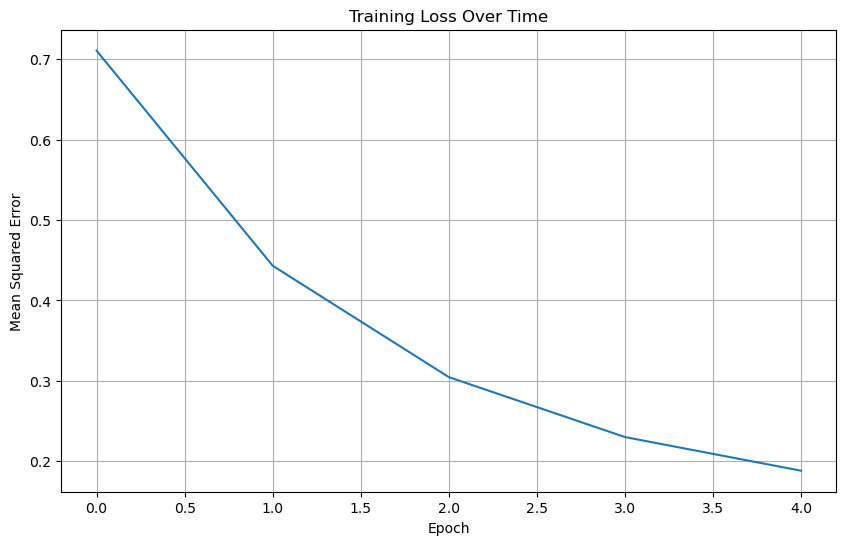

In [84]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

class GradientDescent:
    """Linear regression using gradient descent optimization
    Three types available: batch, mini-batch, stochastic"""
    
    def __init__(self, learning_rate: float = 0.01, epochs: int = 1000, 
                 type: str = 'batch', batch_size: int = None) -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []
        self.w = None
        self.b = None
        self.type = type.lower()  # Convert to lowercase for consistency
        
        # Validate type and batch_size
        if self.type not in ['batch', 'mini-batch', 'stochastic']:
            raise ValueError("Type must be one of: 'batch', 'mini-batch', 'stochastic'")
            
        if self.type == 'mini-batch':
            if batch_size is None:
                raise ValueError("batch_size must be specified when using mini-batch gradient descent")
            if not isinstance(batch_size, int) or batch_size <= 0:
                raise ValueError("batch_size must be a positive integer")
            self.batch_size = batch_size
        
    def initialize_parameters(self, X: np.ndarray) -> None:
        """Initialize weights and bias"""
        n_features = X.shape[1]
        self.w = np.random.randn(n_features) * 0.01
        self.b = 0.0
        
    def calculate_predictions(self, X: np.ndarray) -> np.ndarray:
        """Calculate predictions (y_hat) based on type of gradient descent"""
        if self.type == 'batch':
            return np.dot(X, self.w) + self.b
        elif self.type == 'mini-batch':
            return np.dot(X, self.w) + self.b
        elif self.type == 'stochastic':
            return np.dot(X, self.w) + self.b
    
    def calculate_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Calculate mean squared error loss"""
        #m = len(y_true)
        return np.mean((y_true - y_pred) ** 2)
    
    def calculate_gradients(self, X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> Tuple[np.ndarray, float]:
        """Calculate gradients for weights and bias"""
        if self.type == 'batch' or self.type == 'mini-batch':
            m = len(y)
            dw = -(2/m) * np.dot(X.T, (y - y_pred))
            db = -(2/m) * np.sum(y - y_pred)
            return dw, db
        elif self.type == 'stochastic':
            dw = -(2/1) * np.dot(X.T, (y - y_pred))
            db = -(2/1) * np.sum(y - y_pred)
            return dw, db
    
    def update_parameters(self, dw: np.ndarray, db: float) -> None:
        """Update weights and bias using gradients"""
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db
        
    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True) -> None:
        """Train the model"""
        self.initialize_parameters(X)
        
        for epoch in range(self.epochs):
            if self.type == 'batch':
                # Forward pass
                y_pred = self.calculate_predictions(X)
                
                # Calculate loss
                loss = self.calculate_loss(y, y_pred)
                self.losses.append(loss)
                
                # Calculate gradients
                dw, db = self.calculate_gradients(X, y, y_pred)
                
                # Update parameters
                self.update_parameters(dw, db)
                
            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{self.epochs} - Loss: {loss:.6f}')
            elif self.type == 'mini-batch':
                temp_loss = []
                for i in range(0, X.shape[0], self.batch_size):
                    # Forward pass
                    y_pred = self.calculate_predictions(X[i:i+self.batch_size])
                    
                    # Calculate loss
                    loss = self.calculate_loss(y[i:i+self.batch_size], y_pred)
                    #self.losses.append(loss)
                    temp_loss.append(loss)
                    
                    # Calculate gradients
                    dw, db = self.calculate_gradients(X[i:i+self.batch_size], y[i:i+self.batch_size], y_pred)
                    
                    # Update parameters
                    self.update_parameters(dw, db)
                self.losses.append(temp_loss[-1])
                    
                # Print progress
                if verbose and (epoch + 1) % 100 == 0:
                    print(f'Epoch {epoch+1}/{self.epochs} - Loss: {loss:.6f}')
            elif self.type == 'stochastic':
                for i in range(X.shape[0]):
                    # Forward pass
                    y_pred = self.calculate_predictions(X.iloc[i])

                    # Calculate loss
                    loss = self.calculate_loss(y[i], y_pred)
                    #self.losses.append(loss)

                    # Calculate gradients
                    dw, db = self.calculate_gradients(X.iloc[i], y[i], y_pred)

                    # Update parameters
                    self.update_parameters(dw, db)

                    if i == X.shape[0] - 1:
                        self.losses.append(loss)

                if verbose and (epoch + 1) % 100 == 0:
                    print(f'Epoch {epoch+1}/{self.epochs} - Loss: {loss:.6f}')
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions for new data"""
        return self.calculate_predictions(X)
    
    def plot_loss(self) -> None:
        """Plot the training loss history"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.losses)
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.title('Training Loss Over Time')
        plt.grid(True)
        plt.show()

# Example usage:

model = GradientDescent(learning_rate=0.01, epochs=5, type = 'mini-batch', batch_size=50)
model.fit(x, y)
model.plot_loss()
#predictions = model.predict(X_test)


In [82]:
for i in range(0, 571, 32):
    print(i)

0
32
64
96
128
160
192
224
256
288
320
352
384
416
448
480
512
544


In [5]:
def linear_function(w, x, b):
    """Calculate y_hat using a linear function."""
    t = np.dot(w, x)
    y_hat = t + b
    return y_hat

y_hat = linear_function(w, x, b)
y_hat

9.24804

In [6]:
def loss_function(y, y_hat):
    """Calculate loss function."""
    loss = (y - y_hat)**2
    return loss


y = 90.054222
loss = loss_function(y, y_hat)
loss 

6529.639049417123

In [7]:
def gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb):
    """Find w, b using gradient descent"""
    
    w = w - alpha*dLdw
    b = b - alpha*dLdb
    #print(dLdw)
    return w, b

alpha = 0.01
dLdw = 3
dLdb = 4
w, b = gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb)
w, b

(array([1.97, 2.97]), 2.96)

### SGD

In [8]:
# initialize w, b, epochs, alpha
w = np.array([2, 3])
b = 3
epochs = 5
alpha = 0.000000000001

for i in range(epochs):
    print(f'Epoch: {i+1}')
    for item in range(len(df)):
        # 1. Pick samples
        x = np.array([df['Radio'][item], df['Social Media'][item]])
        y = df['Sales'][item]
        
        # 2. Calculate y_hat
        y_hat = linear_function(w, x, b)

        # 3. Calculate loss
        loss = loss_function(y, y_hat)

        # 4. Calculate gradients/derivatives
        dLdw = 2*(y_hat - y)*x
        dLdb = 2*(y_hat - y)

        # 5. Update weights
        w, b = gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb)
        
        print(f'Iteration {item+1}: w = {w}, b = {b}, loss = {loss}')

Epoch: 1
Iteration 1: w = [2. 3.], b = 3.0000000001616125, loss = 6529.639218302045
Iteration 2: w = [2.00000001 3.        ], b = 3.00000000053965, loss = 35728.08163694323
Iteration 3: w = [2.00000001 3.        ], b = 3.0000000006973186, loss = 6214.850484405595
Iteration 4: w = [2.00000002 3.        ], b = 3.0000000011994947, loss = 63045.18117483493
Iteration 5: w = [2.00000004 3.00000001], b = 3.0000000017038926, loss = 63604.28942293977
Iteration 6: w = [2.00000005 3.00000001], b = 3.00000000208682, loss = 36658.40067145749
Iteration 7: w = [2.00000007 3.00000001], b = 3.0000000025901685, loss = 63339.96917035371
Iteration 8: w = [2.00000007 3.00000001], b = 3.000000002795652, loss = 10555.860095251264
Iteration 9: w = [2.00000008 3.00000001], b = 3.000000003186757, loss = 38240.74857434575
Iteration 10: w = [2.00000008 3.00000001], b = 3.000000003276202, loss = 2000.0945777370825
Iteration 11: w = [2.00000008 3.00000002], b = 3.0000000035106567, loss = 13742.270776174406
Iteratio

**Mini-batch**

In [9]:
np.array([df['Radio'][0:2], df['Social Media'][2-2:2]]).T[0]

array([1.21835388, 1.27044387])

In [10]:
#  initialize w, b, epochs, alpha
mini_batch = 4
w = np.array([5, 7])
b = 4
epochs = 5
alpha = 0.000000000001

for epoch in range(epochs):
    print(f'Epoch: {epoch+1}')

    for batch in np.arange(0, len(df), mini_batch):
        # 1. Pick samples (batch)
        x = np.array([df['Radio'][batch:batch+mini_batch], df['Social Media'][batch:batch+mini_batch]]).T
        y = df['Sales'][batch:batch+mini_batch].values

        cost = 0
        dLdw = 0
        dLdb = 0
        for i in range(mini_batch):
            # 2. Calculate y_hat
            y_hat_i = linear_function(w, x[i], b)

            # 3. Calculate loss
            cost += loss_function(y[i], y_hat_i)

            # 4. Calculate gradients/derivatives
            dLdw += 2*(y_hat_i - y[i])*x[i]
            dLdb += 2*(y_hat_i - y[i])
        
        loss = cost/mini_batch
        dLdb = dLdb/mini_batch
        dLdw = dLdw/mini_batch
        
        # 5. Update w, b
        w, b = gradient_descent(y, y_hat, x, w, b, alpha, dLdw, dLdb)
        
        
        print(f'Iteration {batch}: w = {w}, b = {b}, loss = {loss}')


Epoch: 1
Iteration 0: w = [5. 7.], b = 4.000000000200996, loss = 11917.485809975762
Iteration 4: w = [5.00000001 7.        ], b = 4.000000000383238, loss = 8895.606389848868
Iteration 8: w = [5.00000001 7.        ], b = 4.000000000524855, loss = 5681.98810702785
Iteration 12: w = [5.00000001 7.        ], b = 4.000000000656884, loss = 5028.592241760886
Iteration 16: w = [5.00000002 7.        ], b = 4.000000000842687, loss = 9203.867027767708
Iteration 20: w = [5.00000002 7.        ], b = 4.000000000998214, loss = 11557.67712683423
Iteration 24: w = [5.00000002 7.        ], b = 4.000000001081374, loss = 7831.496610800779
Iteration 28: w = [5.00000003 7.00000001], b = 4.000000001291042, loss = 13653.01335044279
Iteration 32: w = [5.00000003 7.00000001], b = 4.000000001428801, loss = 15078.15531500549
Iteration 36: w = [5.00000004 7.00000001], b = 4.000000001607272, loss = 9794.196960324578
Iteration 40: w = [5.00000004 7.00000001], b = 4.000000001743009, loss = 5889.860825574052
Iteration

In [11]:
np.arange(0, len(df), 2)

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

### Perform Gradient Descent using Sklearn

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [26]:
data.head()
x = data[['Radio', 'Social Media']].dropna()
y = data['Sales'].dropna()

# Scale the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Initialize SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, learning_rate='constant')

# Fit the model
sgd_regressor.fit(x, y)

# Print the coefficients
print(f'w = {sgd_regressor.coef_}, b = {sgd_regressor.intercept_}')

# Print the loss function value
#print(f'Loss function value: {sgd_regressor.loss_}')

w = [70.5808891   6.62378817], b = [203.31458818]


In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features (important for gradient descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Initialize SGD regressor
sgd_reg = SGDRegressor(max_iter=1000, 
                      tol=1e-3, 
                      penalty=None, 
                      eta0=0.1,
                      learning_rate='constant')

# Fit the model
sgd_reg.fit(X_scaled, y)

# Make predictions
y_pred = sgd_reg.predict(X_scaled)

# Print coefficients and intercept
print("Coefficients:", sgd_reg.coef_)
print("Intercept:", sgd_reg.intercept_)

# Calculate R-squared score
r2_score = sgd_reg.score(X_scaled, y)
print("R-squared score:", r2_score)

Coefficients: [55.08181457  2.51941673]
Intercept: [194.71565111]
R-squared score: 0.5929173999893271


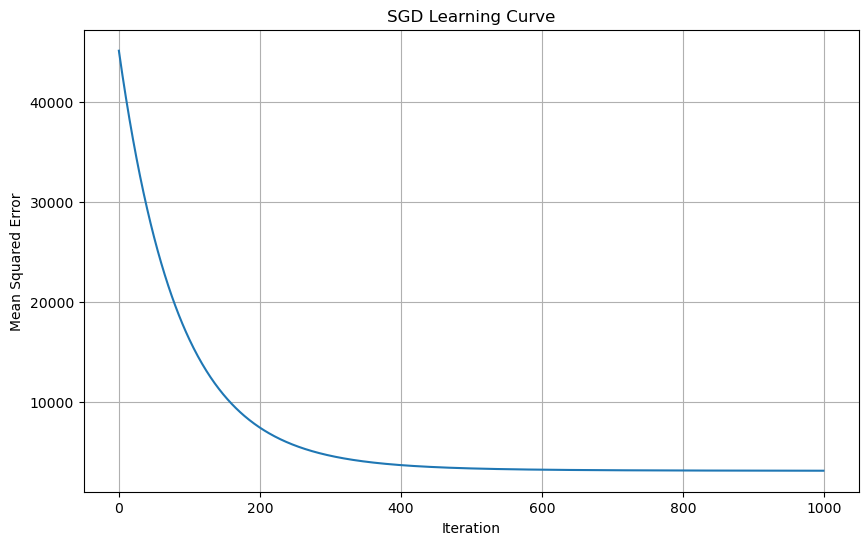

In [36]:
# Plot training history
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def plot_learning_curve(X, y, n_iter=1000):
    sgd_reg = SGDRegressor(max_iter= n_iter, learning_rate='constant', eta0=0.00001)
    losses = []
    
    for _ in range(n_iter):
        sgd_reg.partial_fit(X, y)
        y_pred = sgd_reg.predict(X)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)
    
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('SGD Learning Curve')
    plt.grid(True)
    plt.show()
    
    return sgd_reg

# Call the function with scaled data
model = plot_learning_curve(X_scaled, y)